Original dataset shape: (1025, 14)
Encoded dataset shape : (1025, 23)


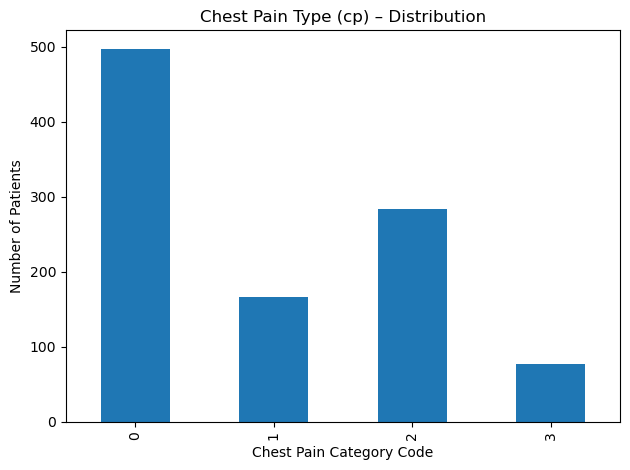

✅ Encoded dataset saved to: results/outputs/heart_encoded.csv


In [1]:
# --- Encoding Categorical Variables (Amarakeerthi H.K.K.U / IT24104102) ---
# Heart Disease Prediction Model - Data Preprocessing

# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 2. Load dataset (adjust path if needed)
df = pd.read_csv("heart.csv")

# 3. Identify categorical columns
# Binary features (already 0/1): keep as they are
binary_like = ["sex", "fbs", "exang"]

# Multi-category integer-coded features: need one-hot encoding
multi_cat_like = ["cp", "restecg", "slope", "ca", "thal"]

# 4. Apply one-hot encoding to multi-category features
# Ensure dummy variables are strictly 0/1 integers
df_encoded = pd.get_dummies(
    df,
    columns=multi_cat_like,
    drop_first=True,
    dtype=int    # <--- force 1/0 instead of True/False
)

# Reorder columns so 'target' (label: heart disease yes/no) is at the end
cols = [c for c in df_encoded.columns if c != "target"] + (["target"] if "target" in df_encoded.columns else [])
df_encoded = df_encoded[cols]

print("Original dataset shape:", df.shape)
print("Encoded dataset shape :", df_encoded.shape)

# 5. EDA Visualization: Distribution of chest pain types (cp)
ax = df["cp"].value_counts().sort_index().plot(kind="bar")
plt.title("Chest Pain Type (cp) – Distribution")
plt.xlabel("Chest Pain Category Code")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

# 6. Save the encoded dataset (for model training later)
output_dir = Path("results/outputs")
output_dir.mkdir(parents=True, exist_ok=True)
encoded_path = output_dir / "heart_encoded.csv"
df_encoded.to_csv(encoded_path, index=False)

print(f"✅ Encoded dataset saved to: {encoded_path}")